Варіант: 18

In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [7]:
df_matrix = pd.read_csv("matrix.csv").set_index("yi")
df_matrix

,1,2,4,6,9,11,12
yi,,,,,,,
3,0,0,0,0,0,7,31
4,0,0,0,2,21,4,0
5,0,0,4,12,6,0,0
7,0,3,22,5,0,0,0
10,4,20,0,0,0,0,0
12,23,0,0,0,0,0,0


In [8]:
def y_cond_mean(matrix):
    ind = matrix.index
    matr_temp = matrix.apply(lambda x: sum(x * ind)/sum(x), axis=0)
    return matr_temp

In [9]:
y_c_mean = y_cond_mean(df_matrix)

x = np.array(y_c_mean.index).astype(float)
y = np.array(y_c_mean.values).astype(float)

In [10]:
pd.DataFrame({'x': x, 'y': y})

,x,y
0,1.0,11.703704
1,2.0,9.608696
2,4.0,6.692308
3,6.0,5.421053
4,9.0,4.222222
5,11.0,3.363636
6,12.0,3.000000


In [11]:
def plot_regression_compare(x, y):
    plt.plot(x, y, label="Дана функція")
    plt.title("Поле кореляції")
    plt.legend()


    plt.show()

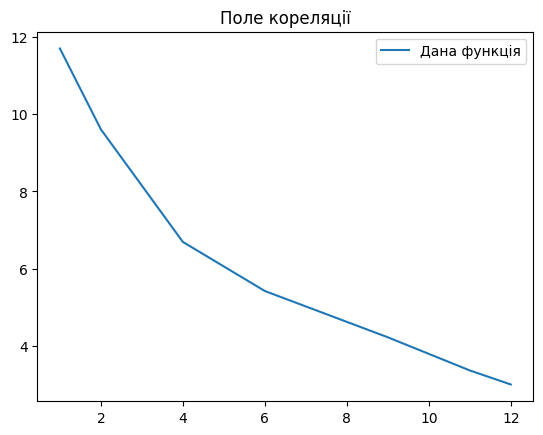

In [12]:
plot_regression_compare(x, y)

Припускаємо що маємо справу з параболiчною кореляцiєю другого порядку y=ax^2 + bx + c

In [13]:
n_i = np.array(df_matrix.sum(axis=0))
n_i

array([27, 23, 26, 19, 27, 11, 31], dtype=int64)

In [14]:
def gauss_elimination(x_i, y_xi, n_i):
    sum_n_x4 = sum(n * (x**4) for n, x in zip(n_i, x_i))
    sum_n_x3 = sum(n * (x**3) for n, x in zip(n_i, x_i))
    sum_n_x2 = sum(n * (x**2) for n, x in zip(n_i, x_i))
    sum_n_x = sum(n * x for n, x in zip(n_i, x_i))
    sum_n = sum(n_i)

    sum_n_y_x2 = sum(n * y * (x**2) for n, x, y in zip(n_i, x_i, y_xi))
    sum_n_y_x = sum(n * y * x for n, x, y in zip(n_i, x_i, y_xi))
    sum_n_y = sum(n * y for n, y in zip(n_i, y_xi))

    A = np.array([
        [sum_n_x4, sum_n_x3, sum_n_x2, sum_n_y_x2],
        [sum_n_x3, sum_n_x2, sum_n_x, sum_n_y_x],
        [sum_n_x2, sum_n_x, sum_n, sum_n_y]
    ], dtype=float)

    def temp(A):
        n = len(A)
        for i in range(n):
            A[i] = A[i] / A[i, i]
            for j in range(i+1, n):
                A[j] = A[j] - A[j, i] * A[i]


        x = np.zeros(n)
        for i in range(n-1, -1, -1):
            x[i] = A[i, -1] - np.dot(A[i, i+1:n], x[i+1:n])
        return x

    coefficients = temp(A)

    a, b, c = coefficients

    return a, b, c


In [15]:
a, b, c = gauss_elimination(x, y, n_i)
a, b, c

(0.07611717430810384, -1.719969491834323, 12.95155211771333)

In [16]:
def plot_par_corr(a, b, c, x, y):
    def f(x):
        return a*x**2 + b*x + c
    
    y_f = f(x)

    plt.plot(x, y, label="Дана функція")
    plt.plot(x, y_f, label="Параболічна регресія")

    plt.legend()

    plt.show()



In [17]:
print(f"Знайдене рівняння: {a:.2f}x^2{b:.2f}x+{c:.2f}")

Знайдене рівняння: 0.08x^2-1.72x+12.95


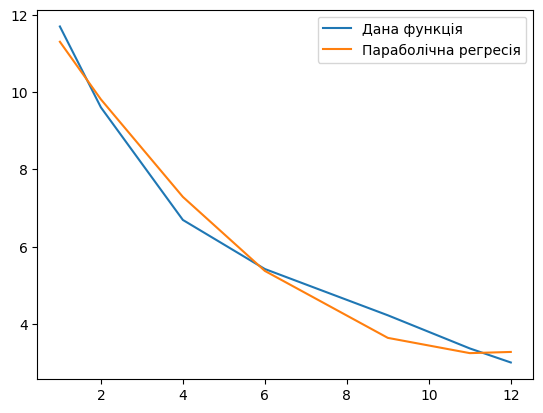

In [18]:
plot_par_corr(a, b, c, x, y)

In [19]:
def get_func(a, b, c):
    return lambda x: a*x**2 + b*x + c

In [20]:
f = get_func(a, b, c)

In [21]:
def disper(x_i, y_i, n_ij):
    n = sum(sum(n_ij[i]) for i in range(len(n_ij)))

    return sum([(y_i[j] - f(x_i[i])) ** 2 * n_ij[j][i] for j in range(len(y_i)) for i in range(len(x_i))]) / n


In [22]:
n_ij = np.array(df_matrix)

In [23]:
print(f"Дисперсія величини Y відносно кривої регресії: {disper(x, np.array(df_matrix.index), n_ij)}")

Дисперсія величини Y відносно кривої регресії: 0.6264622022879744


In [24]:
def scattering(x_i, y_i, n_i):
    return sum([(y_i[i] - f(x_i[i])) ** 2 * n_i[i] for i in range(len(x_i))])

In [25]:
print(f"Сума квадратів відхилень середнiх  вiд  значень функцiї регресiї : {scattering(x, y, n_i)}")

Сума квадратів відхилень середнiх  вiд  значень функцiї регресiї : 26.249748978081808
